In [32]:
%pylab inline
%matplotlib inline
import pandas as pd
import numpy as np

from collections import Counter
import re
from lxml import etree 
from bz2file import BZ2File
import codecs
import nltk
import pickle
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt



Populating the interactive namespace from numpy and matplotlib


/Users/Hidde/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'number', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


#  Mini project week 8

## Notebook made by  

|** Name** | **Student id** | **email**|
|: |:-|:-|
|Hidde de Haan |11028564 |Hiddedehaan@hotmail.com |
|Joep Straatman |11035307 |Straatmanjoep@gmail.com |
|Arjan van Rossum|11038942|Arjan_van_Rossum@outlook.com|
|Bozana Miletic|10778934|bozanamiletic@gmail.com|
|  | |. |







### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. 

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='http://i.imgur.com/3GMiSMB.jpg'/>
<img src='http://s22.postimg.org/kekaedawh/image201510290001.jpg'/>
<img src='http://s3.postimg.org/98btcc02r/20151030_130236.jpg'/>

### Note
* **Assignments without the selfies or completely filled in information will not be graded and receive 0 points.**

# <center> JoepTube


## <center> Een verkennende studie naar de invloed van tags op Youtube views

### <center> De invloed van tags onder YouTube video’s op de populariteit van deze video’s


#### <center> *Joep Straatman, Hidde de Haan, Arjan van Rossum en Bozana Miletic*

<img src='https://extranet.uva.nl/binaries/content/assets/subsites/extranet/extranet/huisstijl/uva-logo-uvamerken_nl-1406x236-300dpi.jpg?2930447015152' />

###### <center> Abstract
<center> De toename van video functionaliteiten en camera’s in mobiele telefoons zorgen voor een verhoogde populariteit van video’s op het web. Mensen besteden steeds meer tijd aan het kijken van online video’s op platformen als Youtube. Deze site laat uploaders van video’s vrij om tags toe te voegen aan video’s om zo met minimale moeite meer blootstelling te krijgen voor hun video’s. In dit verslag wordt onderzocht of de veronderstelling dat tags toevoegen aan Youtube video’s voor meer views zorgt, klopt. De onderzoeksvraag is: Wat is de invloed van tags van trending video’s op de populariteit van deze videos? De verwachting bij dit onderzoek is dat het toevoegen van tags voor meer views zal zorgen.






## Inleiding
Youtube is een website waarop gebruikers hun eigen video’s kunnen uploaden, bekijken en delen met andere gebruikers (Burgers & Green, 2013). Door de toename van video functionaliteiten en camera’s in mobiele telefoons en zorgen onder andere voor een verhoogde populariteit van video’s op het web.   Youtube heeft meer dan anderhalf miljard gebruikers, bijna een derde van het internet (Aslam, 2018). Verder worden er per dag meer dan vijf miljard video’s bekeken en wordt er ongeveer een miljard uur per dag naar Youtube video’s gekeken (Youtube press, 2018). 
Het is dus duidelijk dat Youtube een heel druk bezocht platform is, hierdoor kan het moeilijk zijn om er als maker van video’s bovenuit te springen. <br> <br>Een manier voor gebruikers om hun eigen video’s meer op te laten vallen is door zogenoemde tags onder video’s te zetten. Tags zijn meestal een of meerdere kernwoorden die de inhoud van de video’s kort beschrijven (Anna, 2017). Door deze tags onder video’s te zetten kan de zoekmachine van Youtube hier beter op inspelen, de zoekmachine zoekt dus niet alleen op videotitel maar kijkt o.a. ook naar de tags onder deze video’s. 
De veronderstelling hierdoor is door tags onder video’s te zetten dit voor meer views zorgt, omdat de video’s dus sneller opgepikt zouden moeten worden door de zoekmachine. Deze veronderstelling is echter nog niet duidelijk onderzocht, dit onderzoek gaat daarom kijken of tags van Youtube video’s wel echt voor meer views of weergaven zorgen.
<br> <br> De onderzoeksvraag luidt daarom als volgt: wat is de invloed van tags van trending YouTube video’s op de populariteit van deze video’s? Om dit te onderzoeken is er een dataset gevonden met bijna 25.000 trending Youtube video’s. Trending Youtube video’s zijn video’s die op de trending pagina van youtube staan, deze video’s laten zien wat er op dit moment op Youtube en over de wereld gebeurt (Youtube, 2018). Deze dataset is gekozen omdat die goed kan laten zien waarom Youtube video’s trending worden en wat voor invloed is van de tags op het trending worden van video’s.  De hypothese bij dit onderzoek is dat er een groot positief verband is tussen het aantal tags en het aantal views van Youtube video’s.
 
Daarnaast zijn er een aantal deelvragen opgesteld om structuur te geven aan het onderzoek. Deze deelvragen zijn deels opgesteld vanuit de literatuur en deels vanuit verwachtingen van het onderzoek. De deelvragen zorgen voor relevante informatie, om zo de onderzoeksvraag goed te kunnen beantwoorden. 
      
  ### Deelvragen
* In hoeverre is er een verband tussen het aantal tags en het aantal views?
* In hoeverre is er een verband tussen het aantal tags en de tijd waarin een video trending wordt?
* Komen video’s vaker in de trending-lijst als de video meer tags heeft?
* Hoeveel procent van de tags komen niet voor in de titel, beschrijving of gebruikersnaam?


## Gerelateerd werk (5 artikelen)

Enrichment and Ranking of the YouTube Tag Space and Integration with the Linked Data Cloud 
Choudhury et al. (2009) beschrijven een raamwerk voor het verbeteren, ordenen en integreren van YouTube tags door middel van semantic web technologie. Er worden sociale, tijdelijke en ruimtelijke context gebruikt om de tag-ruimte te verbeteren. Deze multi-dimensionale manier van context filteren om tags te verbeteren maakt het makkelijker en zorgt voor minder ambigue tags om concepten te koppelen.
Ons onderzoek gaat ook over het verbeteren van YouTube tags. In plaats van toepassingsgericht onderzoek doen wij echter explorerend onderzoek naar reeds gebruikte tags. Het artikel van Choudhury et al. biedt voor ons echter wel een onderzoeksrichting en geeft belangrijke onderwerpen binnen deze richting aan.

Tagging Video: Conventions and Strategies of the YouTube Community 
Dit artikel van Geisler en Burns (2007) geen een kwantitatieve analyse over tags en bijbehorende metadata. In het artikel worden methoden en ontwerp overwegingen voorgesteld die de effectiviteit van YouTubers kan verbeteren. De mediaan van het aantal tags per video was 6. 66% van de gebruikte tags kwamen niet voor in de titel, beschrijving of autersvelden van de video. Hieruit kan geconcludeerd worden dat tags gebruikt worden om extra beschrijvingen aan de video toe te voegen. Er blijken echter ook veel tags toegevoegd te worden die de video niet beschrijven, hier kan onderzoek ter verbetering van tags voor worden gedaan.
In ons onderzoek kijken wij of onze dataset soortgelijke resultaten geeft en of wij hier nog meer conclusies aan kunnen verbinden.

On the Dynamics of Social Media Popularity: A YouTube Case Study
In een case study van Figueiredo et al. (2014) wordt geanalyseerd hoe de populariteit van videos zich ontwikkelt vanaf de upload. Hierbij werd gevonden dat er video’s zijn die gedurende een langere periode in populariteit blijven stijgen, zoals met copyright beschermde video’s, en video’s die kort populair zijn, zoals trending video’s. Verder is er gekeken welke manier van verwijzen het meest effectief is. Youtube’s interne mechanismen, zoals de zoekmachine en gerelateerde video’s waren het meest effectief. Ten slotte is er gekeken of er associaties zijn tussen kenmerken van de video, bijvoorbeeld categorie, upload datum en leeftijd), het vroege verloop van populariteit en de verwijzers. Er bleek dat video’s uit dezelfde categorie vaak gelijke inhoud heeft en dat bepaalde kenmerken gecorreleerd zijn met hogere populariteit. Zo zijn video’s met een nieuws aspect vaak kort populair en muziekvideo’s lang. Dit kan naar het huidige onderzoek vertaald worden door te onderzoeken welke tags tijdloos zijn en door te onderzoeken of video’s met deze tags ook daadwerkelijk populairder zijn. 

The Structure of Collaborative Tagging Systems: 
In het paper van Golder & Huberman (2006) omschrijven ze een manier waarop gebruikers samenwerken met taggen. Ze maken gebruik van dezelfde tags om meer populariteit te krijgen. Uit dit paper blijkt wel dat de meeste tags vrij omschrijvend zijn voor hun content en dat dit door andere gebruikers gebruikt kan worden als ze dezelfde onderwerpen “grappig” of “romantisch” vinden. 
In dit paper gaan we daarop in en wordt er, zoals eerder aangegeven, gekeken of de tags die bij video’s staan ook inderdaad omschrijvend zijn, door te kijken of ze ook voorkomen in de titel, beschrijving of auteurs velden van de video. Hieruit zou opgemaakt kunnen worden of tags ook daadwerkelijk ter omschrijving van de inhoud worden gebruikt, of dat ze gebruikt worden in de hoop op meer views. 

Engagement and Popularity Dynamics of YouTube Videos and Sensitivity to Meta-Data
	Het artikel van Hoiles et all (2017) verteld over hoe meta-data invloed kan hebben op de populariteit van een video. Hierin hebben ze het over de titel, tag, thumbnail en beschrijving. Deze factoren van het aanbieden van meta-data schijnen een aanzienlijke invloed te hebben op de views van een video. De de lengte van de tags en het aantal tags zouden met name belangrijk zijn hiervoor. Hoewel tags er niet uitkomen als de belangrijkste vorm van meta-data die een video kan hebben, staat het wel in de top vijf van belangrijkste. 
	In dit onderzoek gaan we daarop in, de veronderstelling is immers dat het aantal tags die een video maker gebruikt, invloed heeft op het aantal views dat de video heeft.






## Methode

Dataset: https://www.kaggle.com/arunkumar413/youtube/notebook

#### Beschrijving data
In de dataset staat youtube data uit de Verenigde Staten van de afgelopen maanden, de auteur geeft geen exacte datum. 
De dataset bevat de volgende kolommen: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, thumbnail_link, comments_disabled, ratings_disabled, video_error_or_removed, description]. <br> <br>‘Video_id’ is van het type ‘object’ en is een uniek ID van letters en cijfers dat aan de video wordt meegeven. ‘Trending_date’ is van het type ‘datetime64[ns]’ en bevat de datum in de vorm ‘jjjj-mm-dd’ waarop de video door YouTube is geclassificeerd als ‘treding’. Wanneer een video trending is wordt deze video op de trending pagina geplaatst waardoor gebruikers deze video sneller tegenkomen dan niet trending video’s. ‘Title’ is van het type ‘object’ en bevat de titel die de uploader gekozen heeft. ‘Channel_title’ is ook van het type ‘object’ en bevat de titel van het kanaal van de uploader van de video. ‘Category_id’ is van het type ‘int64’ en bevat het cijfer van de categorie waar de video onder valt. ‘Publish_time’ is van het type ‘datetime64[ns]’ en bevat de datum in de vorm ‘jjjj-mm-dd’ waarop de video is geüpload. ‘Tags’ is van het type ‘object’ en bevat de tag woorden die aan de video zijn meegegeven door de uploader. ‘Views’ is van het type ‘int64’ en bevat het aantal keer dat de video is bekeken. <br>‘Likes’ is ook van het type ‘int64’ en bevat het aantal kijkers dat op de ‘like’ knop van de video heeft geklikt. ‘Dislikes’ is ook van het type ‘int64’ en bevat het aantal kijkers dat op de ‘dislike’ knop van de video heeft geklikt. ‘Comment_count’ is ook van het type ‘int64’ en bevat het aantal reacties die gebruikers onder de video hebben geplaatst. ‘Thumbnail_link’ is van het type ‘object’ en bevat de link naar afbeelding die gebruikers te zien krijgen voordat zij de video aanklikken. ‘Comments_disabled’ is van het type ‘bool’ en geeft aan of de uploader van de video reageren heeft uitgeschakeld of niet. ‘Ratings_disabled’ is ook van het type ‘bool’ en geeft aan of de uploader liken en disliken heeft uitgeschakeld of niet. ‘Video_error_or_removed’ is ook van het type ‘bool’ en geeft aan of de video uitgeschakeld of verwijderd is van YouTube of niet. ‘Description’ is van het type ‘object’ en geeft de beschrijving weer die de uploader meegeeft aan een video.
	De dataset blijkt een erg volledige beschrijving te geven van de video’s. Er zijn geen vreemd ingevulde of lege cellen te vinden en er zijn geen outliers.

#### Methodologie

Jupyter Notebook is gebruikt om in python te programmeren. Daarin hebben we al onze code geschreven die nodig was om de data te analyseren en visualiseren. Met de module pandas hebben we de data (.csv bestand) omgezet naar een dataframe. Na de kolommen onderzocht te hebben, bleek dat niet alle kolommen nuttig waren voor ons onderzoek. Om die reden is er voor gekozen om de kolommen:  'thumbnail_link', 'comments_disabled', 'ratings_disabled' en 'video_error_or_removed' te verwijderen. De ‘tags’ kolom is opgebouwd uit een string van tags gescheiden door een ‘|’. Voor het onderzoek was het nodig om een aantal nieuwe kolommen te hebben.<br> <br> We hebben daarom de volgende kolommen gemaakt en toegevoegd: ‘category’, ‘tagssplitted’, ‘number_of_tags’, ‘publish_date’, ‘title_occurence’ en ‘time_to_trending’. Met deze nieuwe kolommen konden de resultaten goed vergeleken worden. De kolom ‘category’ is gemaakt door de kolom category_id te linken aan een andere dataset, waarin alle namen van de categorieën stonden. ‘number_of_tags’ geeft aan hoeveel tags een video heeft. 
‘title_occurence’ geeft aan hoevaak de titel van de video voorkomt in trending. Tot slot geeft ‘time_to_trending’ de tijd aan in dagen, hoe lang het duurde voor een filmpje om op de trending pagina te komen.

Uit de literatuur bleek dat 66% van de tags niet voorkwamen in de descriptie, titel of kanaalnaam van een video. Om dit zelf te berekenen is er over elke video geloopt en dan per video over elke tag geloopt. Daarna is per individuele tag gekeken of de tag in de titel, descriptie of kanaalnaam voorkomt. Als dit het geval was dan werd er een counter verhoogd met 1. Als laatste hebben we die variabele gedeelt door het totaal aantal tags en dat kwam uit op ongeveer 75%.

De bar charts zijn allemaal van hoog naar laag gesorteerd, zodat het resultaat snel zichtbaar is. Door middel van pandas plot hebben we alle plots dezelfde layout gegeven. Ook hebben we met polyfit een lijn gemaakt door de plot, om gemakkelijk het gemiddelde te laten zien.


# Originele dataset

In [33]:

us_videosbasic = pd.read_csv('https://raw.githubusercontent.com/JoepStraatman/JoepTube/master/USvideos1.csv')
us_videosbasic.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Bewerkte dataset

In [34]:
us_videos = pd.read_csv('https://raw.githubusercontent.com/JoepStraatman/JoepTube/master/USvideos1.csv')
listje= {1:'Film & Animation ',2:'Autos & Vehicles',10:'Music',15:'Pets & Animals',17:'Sports',18:'Short Movies',19:'Travel & Events',20:'Gaming',21:'Videoblogging',22:'People & Blogs',23:'Comedy',24:'Entertainment',25:'News & Politics',26:'Howto & Style',27:'Education',28:'Science & Technology',29:'Nonprofits & Activism',30:'Movies',31:'Anime/Animation',32:'Action/Adventure',33:'Classics',34:'Comedy',35:'Documentary',36:'Drama',37:'Family',38:'Foreign',39:'Horror',40:'Sci-Fi/Fantasy',41:'Thriller',42:'Shorts',43:'Shows',44:'Trailers'}
us_videos['category'] = us_videos['category_id']
us_videos['category'].replace(listje, inplace=True)

us_videos["tagssplitted"] = us_videos.tags.str.split('|')
us_videos["number_of_tags"] = us_videos['tagssplitted'].str.len()
us_videos["average_tag_length"] = us_videos.tags.str.len() / us_videos.number_of_tags

publishlist = us_videos.publish_time.tolist()
publishdatelist = {}
counter = 0
for item in publishlist:
    year = item[2:4]
    month = item[5:7]
    day = item[8:10]
    date = str.join('.', (year,day,month))
    publishdatelist[counter] = date
    counter +=1

publish = pd.DataFrame.from_dict(publishdatelist, orient='index')
publish.columns = ['publish_date']

df = pd.concat([us_videos, publish], axis=1)
df = df.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed'],axis=1)
df['title_occurence'] =  df.groupby(['channel_title'])['channel_title'].transform('count')

from datetime import datetime
from dateutil.parser import parse

pubdate1 = [x.replace(".", "-") for x in df.publish_date]
pubdate2 = [('20'+ x) for x in pubdate1]
pubdate = [datetime.strptime(x, '%Y-%d-%m') for x in pubdate2]

trendate1 = [x.replace(".", "-") for x in df.trending_date]
trendate2 = [('20'+ x) for x in trendate1]
trendate = [datetime.strptime(x, '%Y-%d-%m') for x in trendate2]

differance = []
for x in range(len(trendate)):
    differance.append((trendate[x] - pubdate[x]).days)

df['time_to_trending'] = differance

In [35]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,category,tagssplitted,number_of_tags,average_tag_length,publish_date,title_occurence,time_to_trending
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,[SHANtell martin],1,15.000000,17.13.11,66,1
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,"One year after the presidential election, John...",Entertainment,"[last week tonight trump presidency, ""last wee...",4,25.500000,17.13.11,24,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""...",23,13.652174,17.12.11,39,2
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,Today we find out if Link is a Nickelback amat...,Entertainment,"[rhett and link, ""gmm"", ""good mythical morning...",27,17.666667,17.13.11,78,1
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,I know it's been a while since we did this sho...,Entertainment,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y...",14,8.571429,17.12.11,35,2


# Visualisaties

In [36]:
import matplotlib.gridspec as gridspec
matrix_corr = df.loc[:,['views', 'likes', 'dislikes', 'comment_count', 'title_occurence','number_of_tags']].corr()


masking = np.zeros_like(matrix_corr, dtype=np.bool)
masking[np.triu_indices_from(masking)] = True

Text(0.5,1,'Figuur 1: Matrix views')

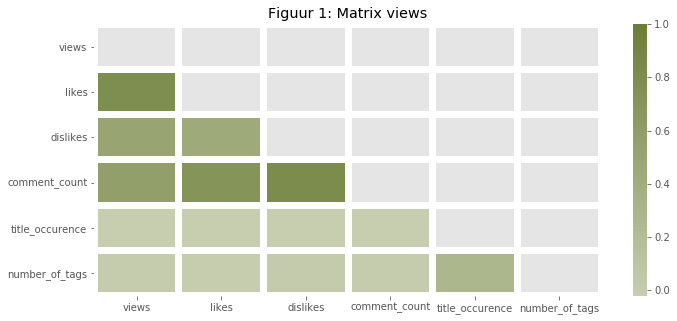

In [37]:
fig = plt.figure(figsize=(25, 5))
grid_spec = gridspec.GridSpec(1, 2, width_ratios=[5,5])
cmap = sns.diverging_palette(100, 100, as_cmap=True)
correlation_fig = plt.subplot(grid_spec[0,0])
correlation_fig = sns.heatmap(matrix_corr, cmap=cmap, center=-0.6,
            linewidths=6, mask=masking)

correlation_fig.set_title('Figuur 1: Matrix views')

Text(0.5,1,'Figuur 2: Soort tags')

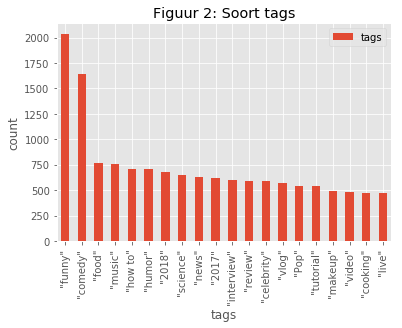

In [38]:
final_tags = df['tagssplitted'].values
splitted = [x for y in final_tags  for x in y]
splitted = [x for x in splitted if x != '[none]']
tags_count= Counter(splitted)
count_df = pd.DataFrame.from_dict(tags_count, orient='index').reset_index()
count_df.columns = ['count','tags']
count_df = count_df[count_df['count'] != '[none]']
count_df1 = count_df.sort_values('tags',ascending=False)
count_plot = count_df1.head(20)
plt.figure()
count_plot.plot(x = 'count', y = 'tags', kind='bar')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.xlabel('tags')
plt.title('Figuur 2: Soort tags')





Text(0.5,1,'Figuur 3: word cloud')

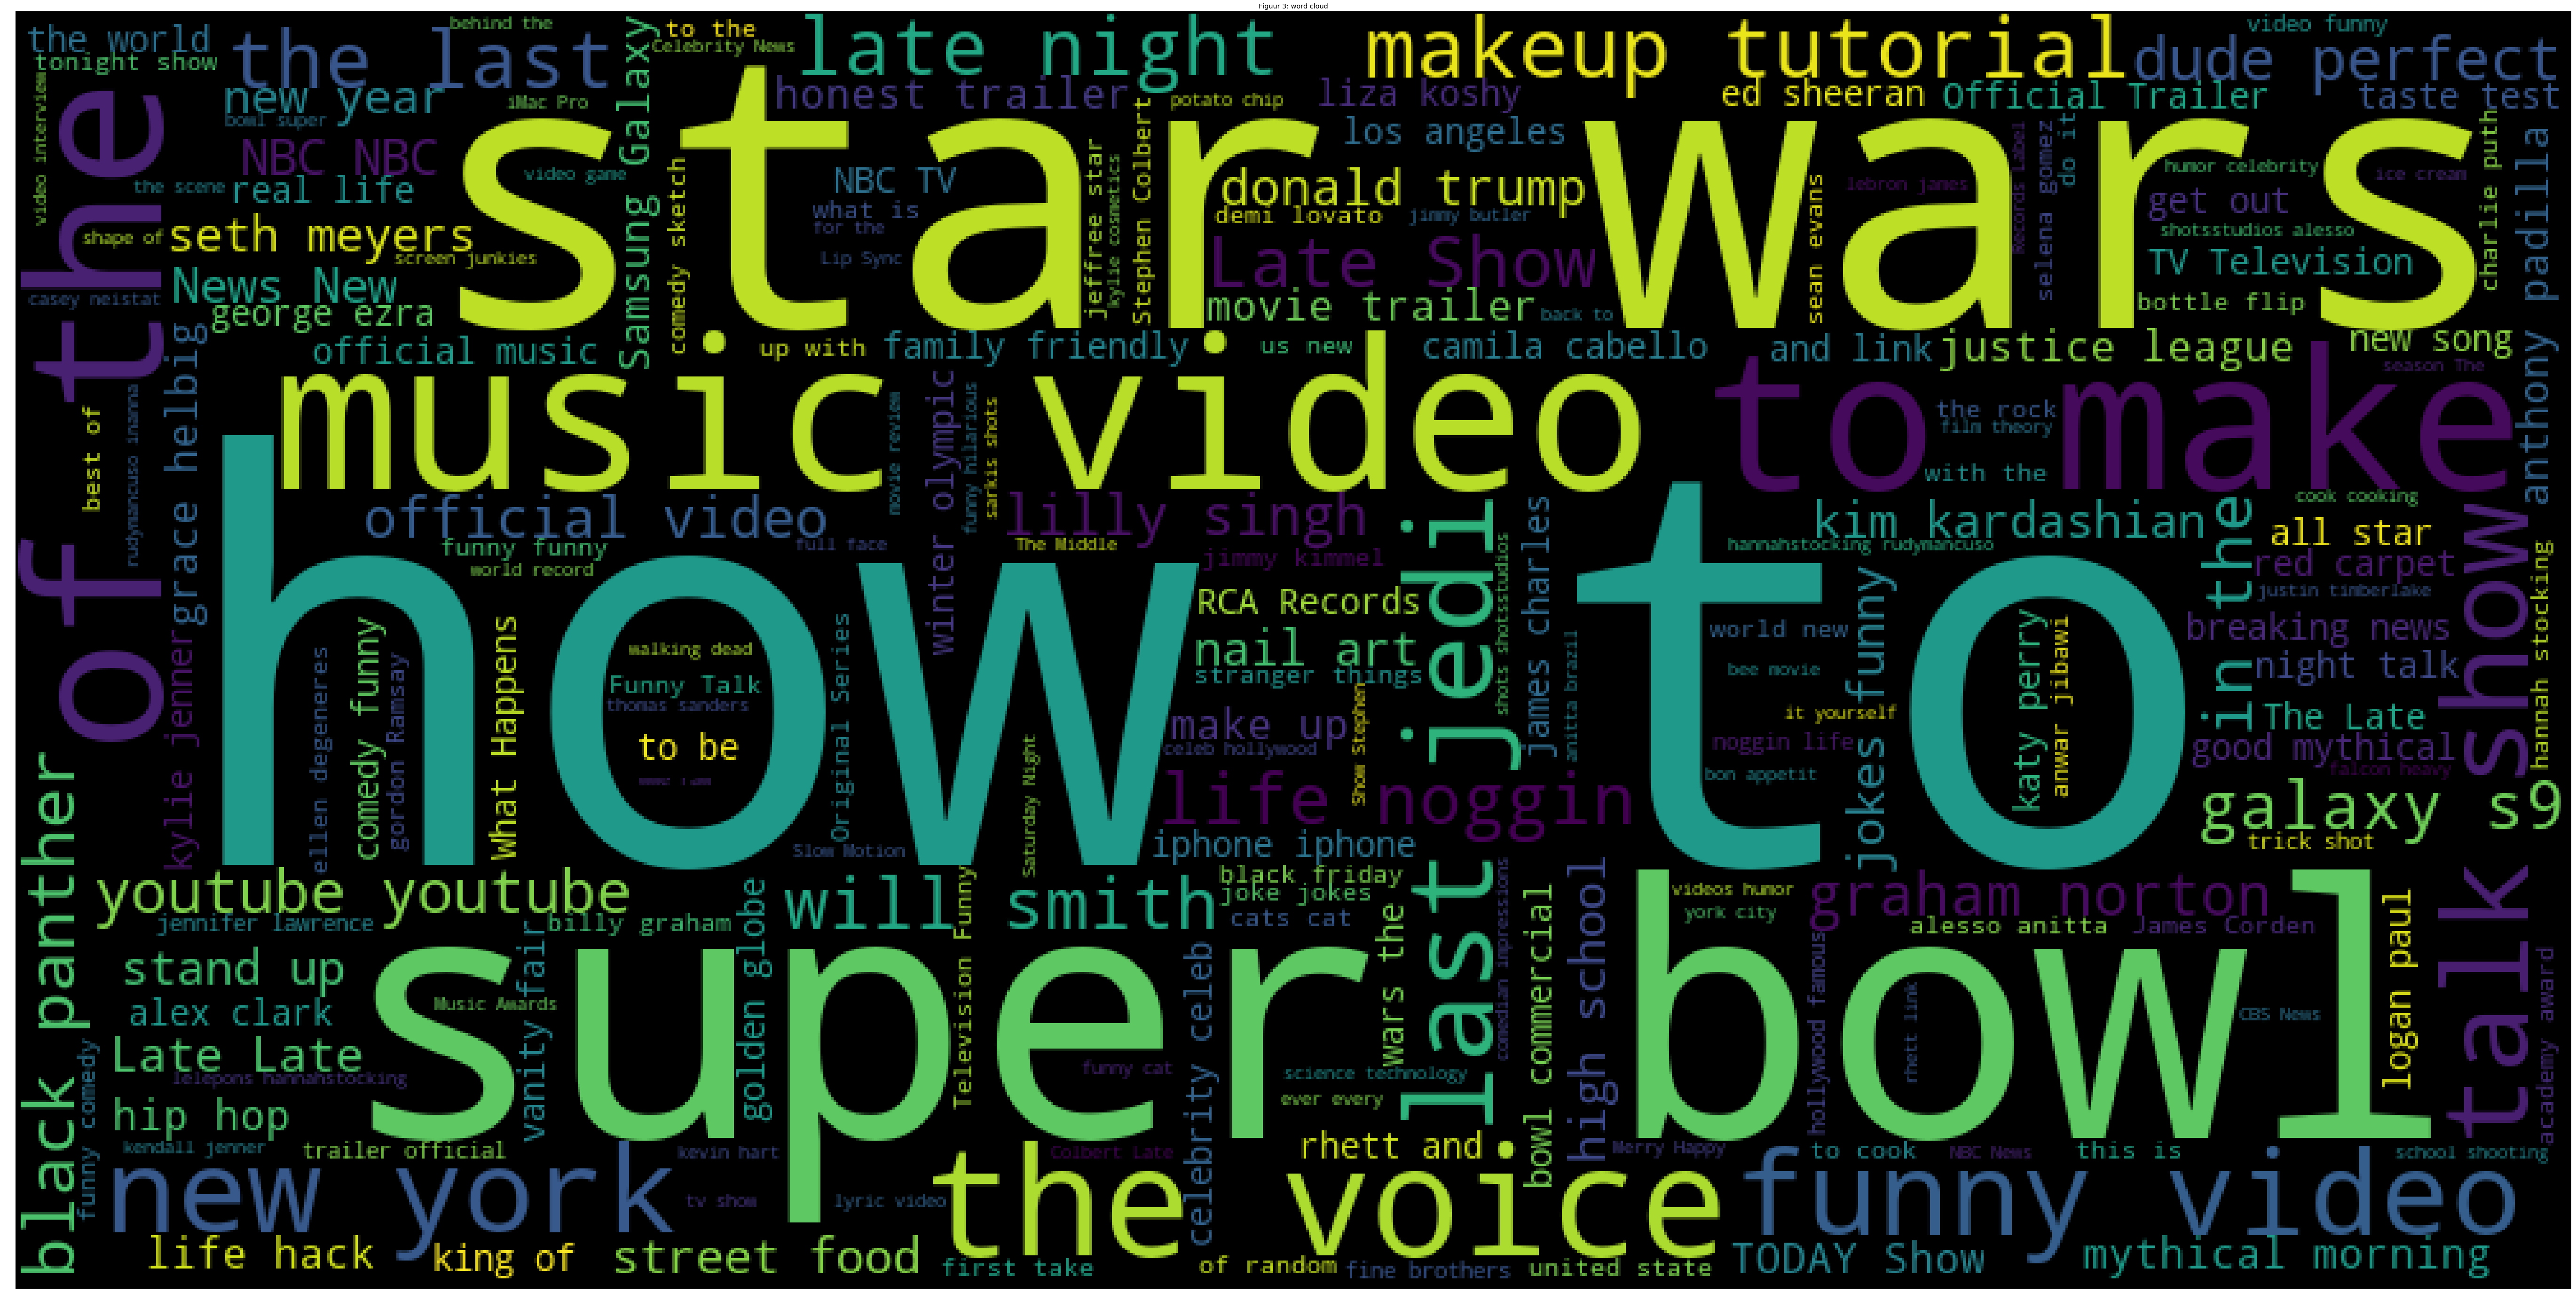

In [39]:
k= (' '.join(df['tags']))


tags_stopwords= ['None','none','[ none ]','[ None ]']
wordcloud = WordCloud(width = 1000, height = 500,stopwords =tags_stopwords).generate(k)
plt.figure(figsize=(150,50))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Figuur 3: word cloud')



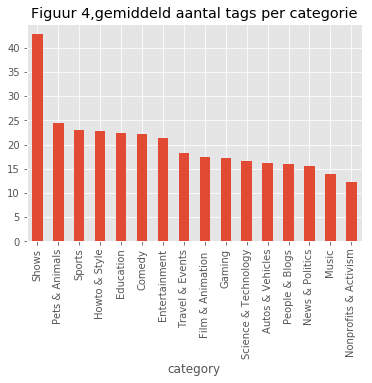

In [40]:
df.groupby('category').number_of_tags.mean().sort_values(ascending=False).plot(kind="bar")

plt.title("Figuur 4,gemiddeld aantal tags per categorie")
plt.show()

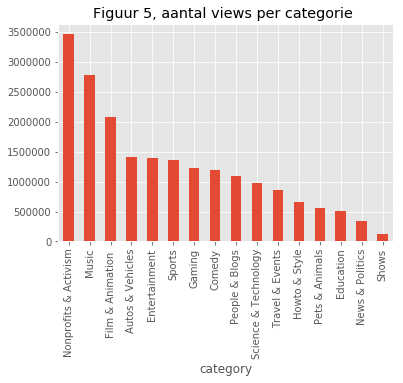

In [41]:
df.groupby('category').views.mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Figuur 5, aantal views per categorie ")
plt.show()

In [42]:
us_videos["tagssplitted"] = us_videos.tags.str.split('|')
us_videos["number_of_tags"] = us_videos['tagssplitted'].str.len()
us_videos["average_tag_length"] = us_videos.tags.str.len() / us_videos.number_of_tags

test = us_videos["dislikes"] > us_videos["likes"]
len (test[test == True])


519

Text(0.5,1,'Figuur 6: correlatie')

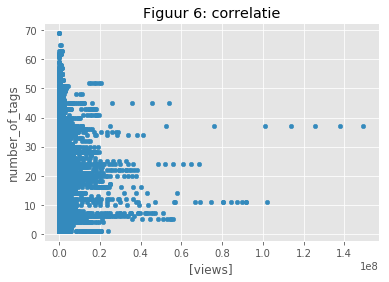

In [43]:
us_videos.plot(y="number_of_tags", x=["views"], kind="scatter")
us_videos['number_of_tags'].corr(us_videos['views'])
plt.title('Figuur 6: correlatie')

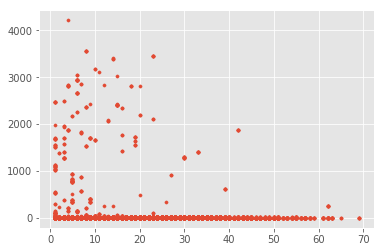

In [44]:
import matplotlib.pyplot as plt
x = df['number_of_tags'].tolist()
y = df['time_to_trending'].tolist()
plt.style.use('ggplot')
plt.scatter(x, y, s=10)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

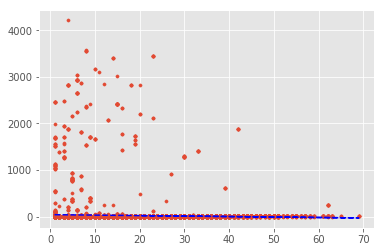

-0.066059958419457429

In [45]:
x = df['number_of_tags'].tolist()
y = df['time_to_trending'].tolist()
plt.style.use('ggplot')
plt.scatter(x, y, s=10)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
plt.show()

df['number_of_tags'].corr(df['time_to_trending'])

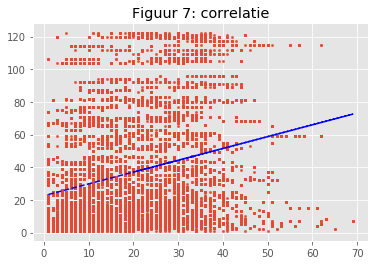

0.26731323888149727

In [46]:
x = df['number_of_tags'].tolist()
y = df['title_occurence'].tolist()
plt.style.use('ggplot')
plt.scatter(x, y, s=5)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
plt.title('Figuur 7: correlatie')
plt.show()

df['number_of_tags'].corr(df['title_occurence'])

In [47]:
# Zijn de tags wel relevant voor de video?

distinctlijst = df['tagssplitted'].tolist()
sumtags = 0
indexlijst = df.index.tolist()
number = 0
for x in range(len(distinctlijst)):
    for naam in distinctlijst[x]:
        naam = naam.replace('"', '')
        if naam not in str(df.loc[x, 'title']).lower() and naam not in str(df.loc[x,'description']).lower() and naam not in str(df.loc[x,'channel_title']).lower():
            number += 1
num = df['number_of_tags'].sum()
print (number / num * 100 , '%')

74.78976804809612 %


### Uitleg visualisaties

Allereerst wordt de data beschreven aan de hand van een correlatiematrix zoals te zien in figuur 1. Hier wordt meteen duidelijk dat comment count, dislikes, views en likes allemaal een hoge correlatie met elkaar hebben. Dit is ook wel logisch want als er meer comments of views zijn, dan zijn er waarschijnlijk ook wel meer dislikes,likes,etc. Verder  valt uit deze correlatie matrix gelijk op te merken dat tags weinig correleert met andere features van een video. 
Wel is het interessant om te kijken hoe deze correlaties tot stand zijn gekomen. Dit wordt gedaan door een histogram te laten zien met de meest voorkomende tags zoals te zien in figuur 2. Hieruit blijkt gelijk al dat de meest voorkomende tags weinig beschrijving toevoegen. 

Interessanter blijkt om naar combinaties van woorden te kijken: bigrams. Dit wordt gedaan aan de hand van een word cloud, zoals te zien in figuur 3. Aan 2 veel voorkomende bigrams blijkt gelijk dat het om een dataset gaat van trending video’s van het afgelopen half jaar uit de VS gaat: ‘Super Bowl’ en ‘Star Wars’. 
Na specifieke onderwerpen onderzocht te hebben kan meer globaal gekeken worden door categorieën te onderzoeken. Uit figuur 4 blijkt dat video’s onder de categorie ‘shows’ het meeste tags toegekend krijgen. In het histogram uit figuur 5 is echter te zien dat deze categorie nauwelijks wordt bekeken, dit kan de lage correlatie tussen tags en views uit figuur 1 verklaren. 

Deze correlatie wordt nader toegelicht in de scatterplot van figuur 6. Hier is een klein verband te zien tussen het aantal tags en het aantal views. Het gevolg hiervan is te zien in de scatterplot van figuur 7, waarin een klein verband is tussen het aantal tags en de tijd waarin in video op de trending pagina terecht komt. 
Ten slotte blijkt de dataset redelijk overeen te komen in de dataset uit voorgaand onderzoek (Geisler en Burns, 2007) in het feit dat een hoog percentage van de tags niet voorkomt in de titel, beschrijving of upload account van de video. Dit percentage is namelijk 75%, tegenover de eerder gevonden 66%.


# Conclusie

Er is een positief verband tussen het aantal tags en het aantal views, deze correlatie is echter heel erg laag. Zo laag dat er eigenlijk geen significant verband vastgesteld kan worden tussen het aantal tags en het aantal views. Er is geen verband tussen het aantal tags en de tijd waarin een video trending wordt. Video’s komen niet vaker in de trending-lijst als de video meer tags heeft. 75% Van de tags komen niet voor in de titel, beschrijving of gebruikersnaam.

Uit de resultaten blijkt dat video’s meer meer tags wel degelijk meer views krijgen, meer likes krijgen en sneller op de trending-pagina verschijnen. Dit geldt echter alleen tot op zekere hoogte, na over een bepaald punt heen te gaan blijkt het niet meer te gelden. Daarnaast blijkt taggen niet te correleren met populariteit. Een populaire video kan geen tags bevatten en een onpopulaire video kan veel tags bevatten. 

Onder video’s in de categorie ‘entertainment’ worden gemiddeld het meeste tags geplaatst, terwijl video’s in de categorie ‘music’ gemiddeld het grootste aantal likes krijgen. Dit laat wederom zien dat de tags niet doorslaggevend zijn voor de populariteit van een video.


## Referenties

Anna. (2017). How to optimize your youtube tags to get more views. Op het internet: https://whyvideoisgreat.com/optimize-youtube-tags geraadpleegd op 28-03-2018.

Aslam, S. (2018). YouTube by the Numbers: Stats, Demographics & Fun Facts. Op het internet: https://www.omnicoreagency.com/youtube-statistics/, geraadpleegd op 30-03-2018.

Burgess, J., & Green, J. (2013). YouTube: Online video and participatory culture. John Wiley & Sons.

Choudhury, S., Breslin, J. G., & Passant, A. (2009, October). Enrichment and ranking of the youtube tag space and integration with the linked data cloud. In International Semantic Web Conference (pp. 747-762). Springer, Berlin, Heidelberg.
https://link.springer.com/content/pdf/10.1007/978-3-642-04930-9_47.pdf geraadpleegd op 28-3-2018.

Figueiredo, F., Almeida, J. M., Gonçalves, M. A., & Benevenuto, F. (2014). On the dynamics of social media popularity: A YouTube case study. ACM Transactions on Internet Technology (TOIT), 14(4), 24.
https://arxiv.org/pdf/1402.1777.pdf geraadpleegd op 28-3-2018.

Geisler, G., & Burns, S. (2007, June). Tagging video: conventions and strategies of the YouTube community. In Proceedings of the 7th ACM/IEEE-CS joint conference on Digital libraries (pp. 480-480). ACM.
http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.119.2836&rep=rep1&type=pdf geraadpleegd op 28-3-2018.

Golder, S. A., & Huberman, B. A. (2006). Usage patterns of collaborative tagging systems. Journal of information science, 32(2), 198-208.
http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.133.9217 geraadpleegd op 4-4-2018

Hoiles, W., Aprem, A., & Krishnamurthy, V. (2017). Engagement and Popularity Dynamics of YouTube Videos and Sensitivity to Meta-Data. IEEE Transactions on Knowledge and Data Engineering, 29(7), 1426-1437.
http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7879356 geraadpleegd op 4-4-2018.

Youtube. (2018). Trending on Youtube. Op het internet: https://support.google.com/youtube/answer/7239739?hl=en, geraadpleegd op 02-04-2018.